In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [64]:
sal=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [65]:
type(sal)

pandas.core.frame.DataFrame

In [66]:
sal.shape

(397, 6)

There are 397 rows and 6 columns in our dataframe

In [67]:
print("Columns present in our dataset:\n",sal.columns)

Columns present in our dataset:
 Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')


In [68]:
# To get good overview of the dataset
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage. The dataset contains both object and int type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models. Since counts of all the columns are same, which means there are no null values present in the dataset.

In [69]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

We can see there are no missing values in any of the columns.

In [70]:
sal.nunique().to_frame("Unique Values")

,Unique Values
rank,3
discipline,2
yrs.since.phd,53
yrs.service,52
sex,2
salary,371


# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='rank', ylabel='count'>

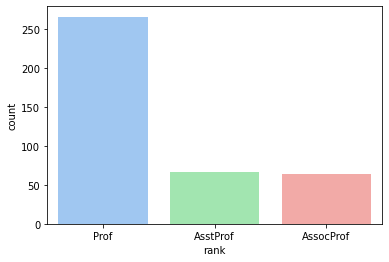

In [71]:
sns.countplot(sal["rank"])


<AxesSubplot:xlabel='discipline', ylabel='count'>

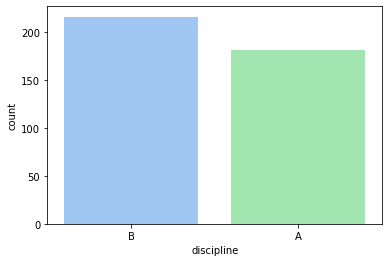

In [72]:
sns.countplot(sal["discipline"])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='count'>

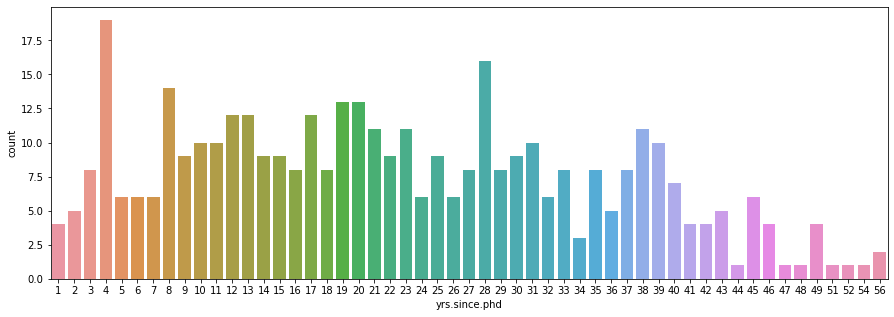

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(sal['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='count'>

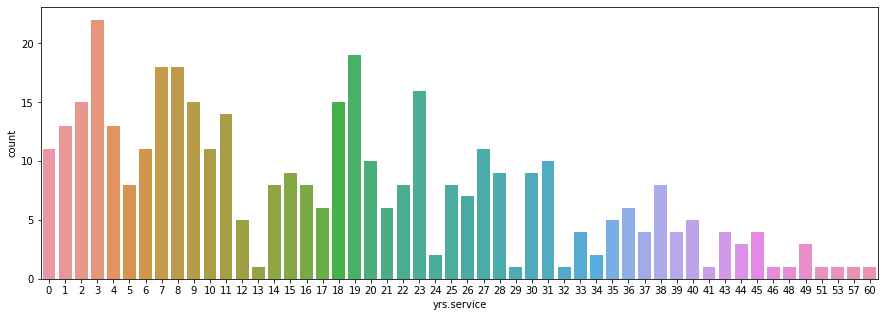

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(sal['yrs.service'])

<AxesSubplot:xlabel='sex', ylabel='count'>

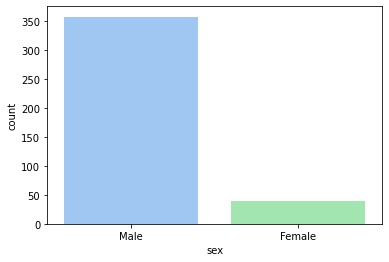

In [75]:
sns.countplot(sal["sex"])

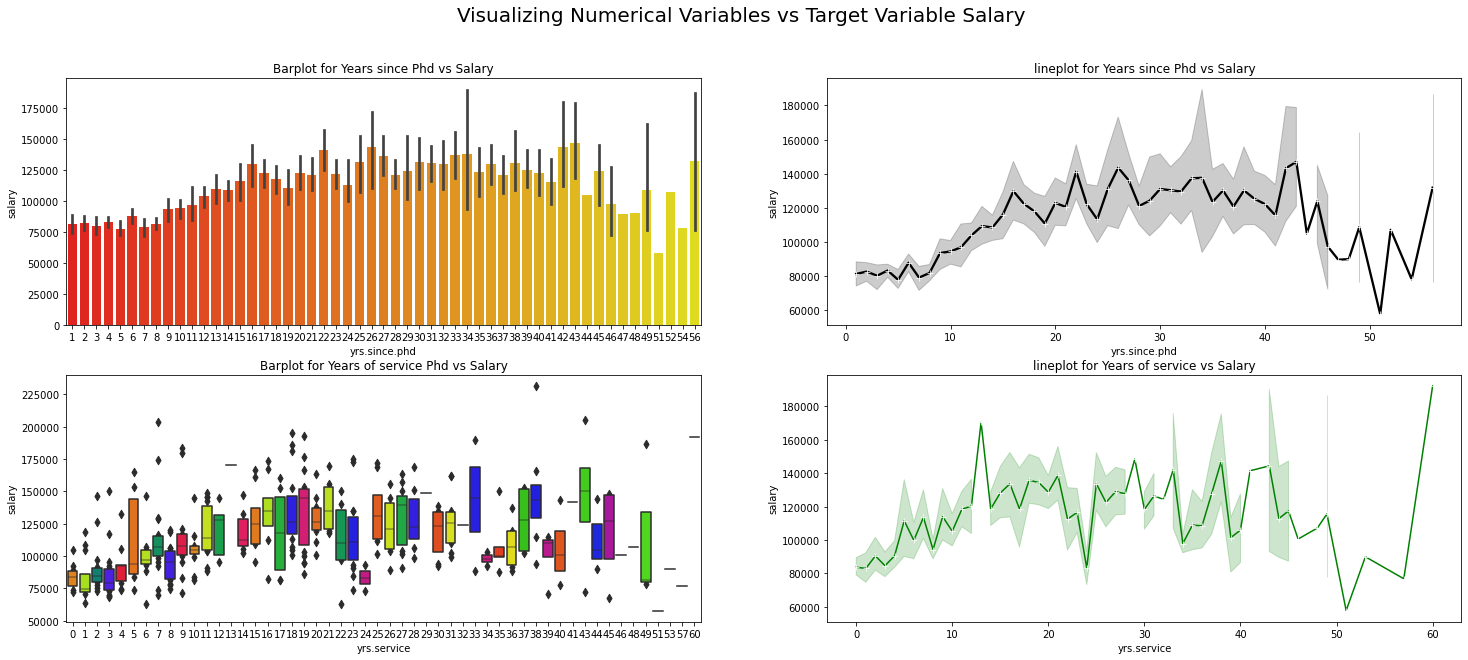

In [76]:
plt.figure(figsize = (25,10))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Salary",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Years since Phd vs Salary")
sns.barplot(x= sal['yrs.since.phd'], y= sal['salary'], data=sal, palette = "autumn", linewidth=2)

plt.subplot(2,2,2)
plt.title("lineplot for Years since Phd vs Salary")
sns.lineplot(x = sal['yrs.since.phd'], y= sal['salary'], marker="+", color='k', linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Years of service Phd vs Salary")
sns.boxenplot(x='yrs.service', y='salary', data=sal, palette = "prism", color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Years of service vs Salary")
sns.lineplot(x='yrs.service', y='salary', data=sal, marker="+", color='g')

plt.show()

Form above figures, we can see salary is higher with more no. of years of service and years since phd.

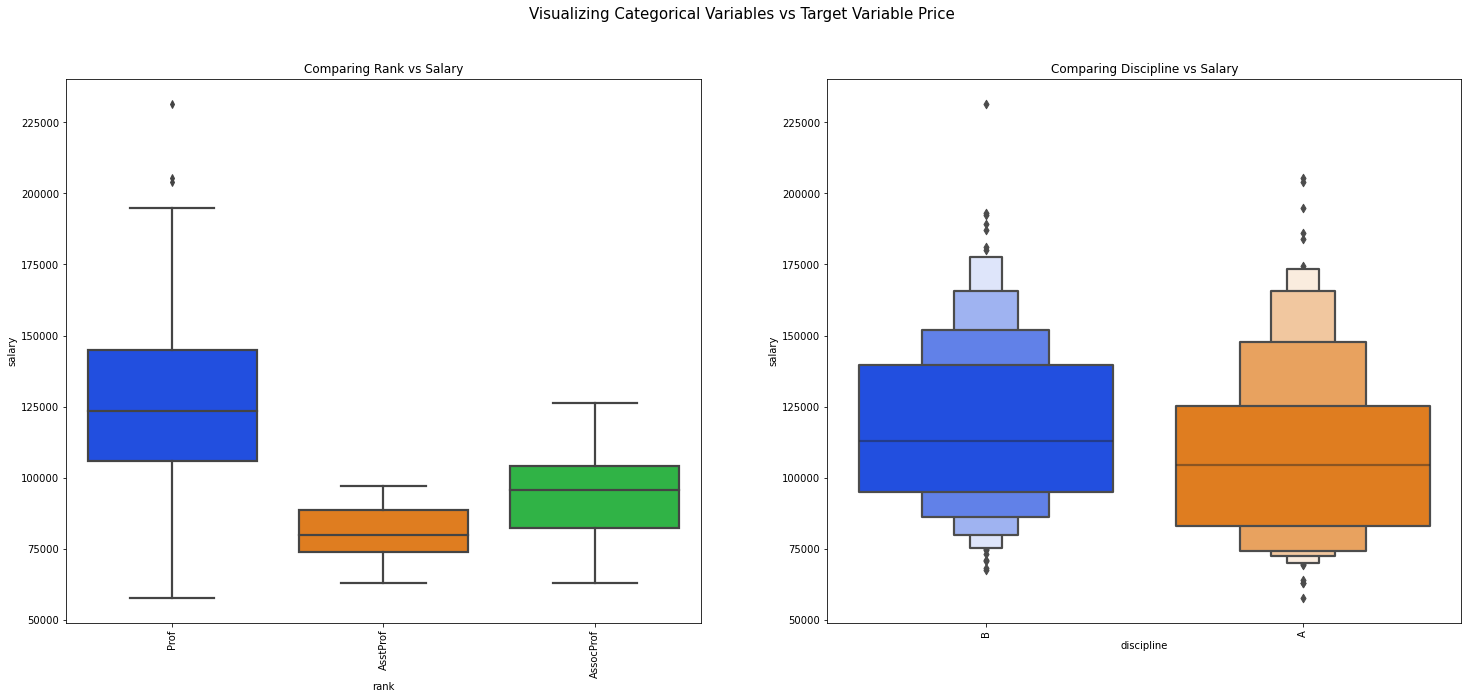

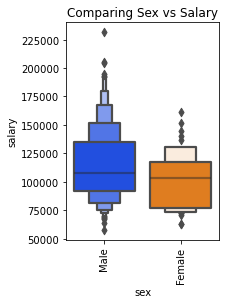

In [77]:
plt.figure(figsize = (25,10))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking how salary changes with rank
plt.subplot(1,2,1)
plt.title("Comparing Rank vs Salary")
sns.boxplot(x= sal['rank'],y= sal['salary'],palette = "bright",linewidth=2.2)
plt.xticks(rotation = 90)

# Checking how salary changes with discipline
plt.subplot(1,2,2)
plt.title("Comparing Discipline vs Salary")
sns.boxenplot(x = sal['discipline'],y= sal['salary'],palette = "bright",linewidth=2.2)
plt.xticks(rotation = 90)
plt.show()

# Checking how salary changes with sex
plt.subplot(1,2,2)
plt.title("Comparing Sex vs Salary")
sns.boxenplot(x = sal['sex'],y= sal['salary'],palette = "bright",linewidth=2.2)
plt.xticks(rotation = 90)
plt.show()

From above figures, we can see salary is higher for professors and discipline B gets higher salary. Also, Male gets more salary than female.

In [78]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In the 5 point summary, we can see there are skewness in data

In [79]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(sal['rank'])
dis_label = le.fit_transform(sal['discipline']) 
sex_label = le.fit_transform(sal['sex'])

sal["rank"] = label
sal["discipline"] = dis_label
sal["sex"] = sex_label
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [80]:
int_datatype

['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [81]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


In [82]:
import warnings
warnings.filterwarnings('ignore')

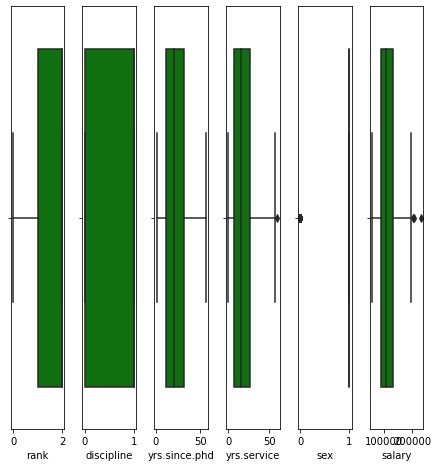

In [83]:
collist=sal.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sal[collist[i]],color='green',orient='h')
    plt.tight_layout()#fits all graphs in one single format

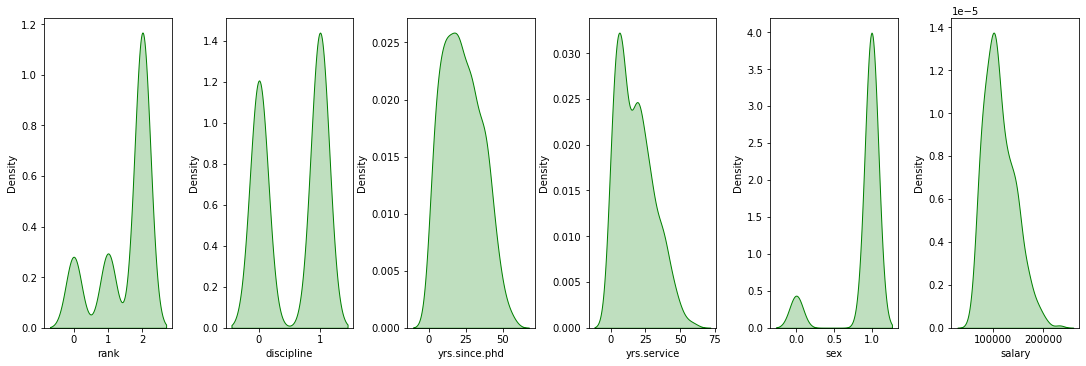

In [84]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in sal[int_datatype].items():
    sns.distplot(value,ax=ax[index], hist=False, color="g", kde_kws={'shade':True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


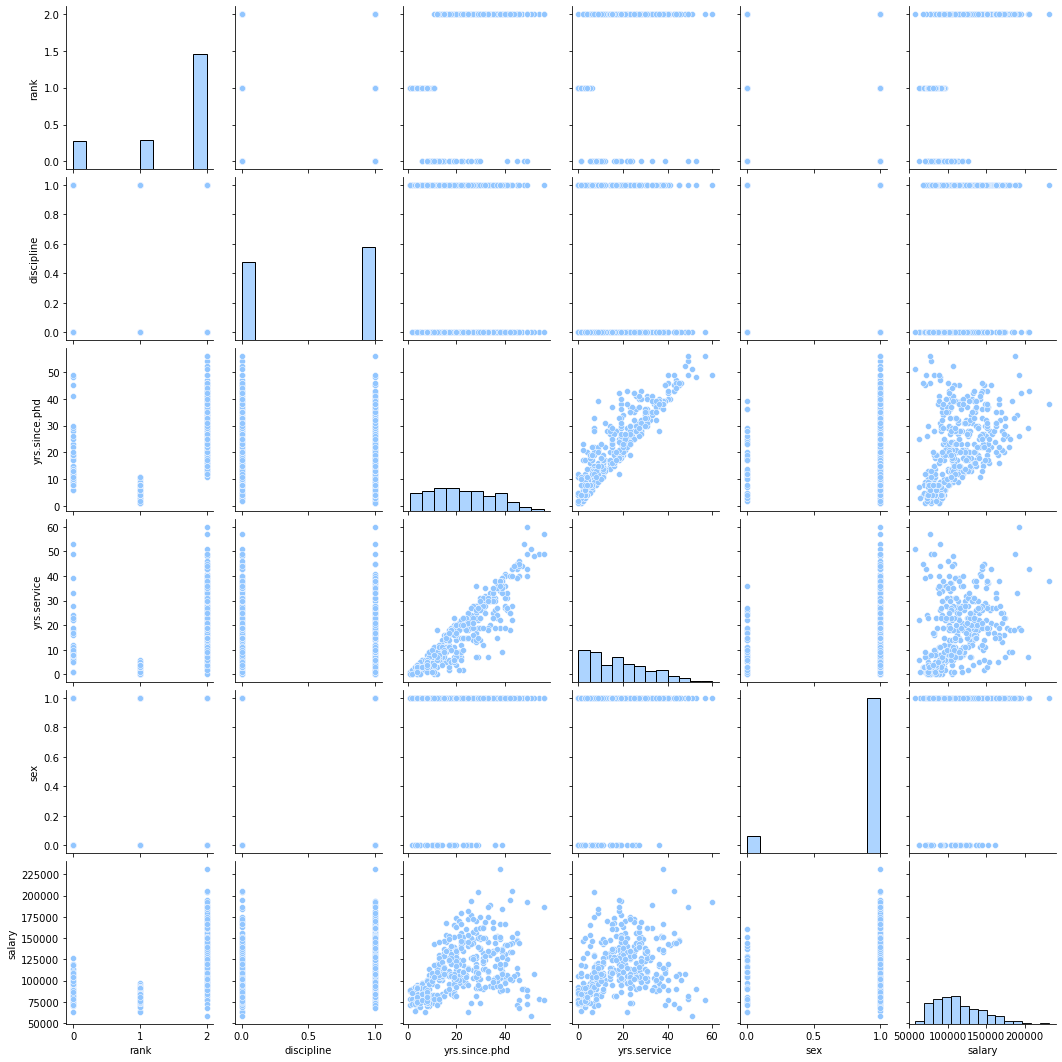

In [85]:
sns.pairplot(sal)

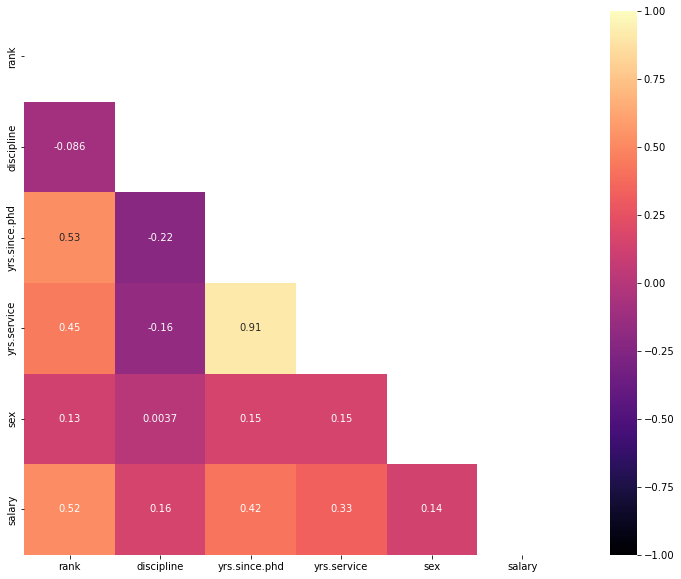

In [86]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(sal.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(sal.corr(),vmin=-1,vmax=1,annot=True, square=True, cmap='magma', annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Skewness threshold taken +/- 0.75

since yrs.service is highly correleated to that years since phd so, we just need to drop one of them.

In [87]:
sal.drop('yrs.service', axis=1,inplace=True)
sal

,rank,discipline,yrs.since.phd,sex,salary
0,2,1,19,1,139750
1,2,1,20,1,173200
2,1,1,4,1,79750
3,2,1,45,1,115000
4,2,1,40,1,141500
...,...,...,...,...,...
392,2,0,33,1,103106
393,2,0,31,1,150564
394,2,0,42,1,101738
395,2,0,25,1,95329


# Outliers:

Z-score Technique:

In [88]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(sal))
threashold=3
sal1=sal[(z<3).all(axis=1)]
sal1.shape

(356, 5)

In [89]:
threshold=3
#index number
print(np.where(z>3))#returns index location of ouliers

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 132, 133, 148, 153, 179, 186, 218, 230,
       231, 233, 237, 245, 253, 254, 274, 316, 323, 332, 334, 341, 358,
       361, 364], dtype=int64), array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
      dtype=int64))


In [90]:
len(np.where(z>3)[0])

41

In [91]:
z.iloc[9]

rank             0.649257
discipline       0.915403
yrs.since.phd    0.335245
sex              3.029767
salary           0.505557
Name: 9, dtype: float64

In [92]:
#to drop Outliers;
sal_new=sal[(z<3).all(axis=1)]
print("old dataFrame",sal.shape)
print("new dataFrame",sal_new.shape)
print("total dropped rows",sal.shape[0]-sal_new.shape[0])

old dataFrame (397, 5)
new dataFrame (356, 5)
total dropped rows 41


percentage data loss

In [93]:
loss_percent=(397-354)/397*100
print(loss_percent,'%')

10.831234256926953 %


# Skewness

In [94]:
sal1.skew()

rank            -1.250361
discipline      -0.181271
yrs.since.phd    0.256629
sex              0.000000
salary           0.600073
dtype: float64

# Splitting the whole dataset into two parts namely X and Y

In [95]:
x=sal1.drop('salary',axis=1)
y=sal1['salary']

In [96]:
x.shape,y.shape

((356, 4), (356,))

# Feature Scaling

In [97]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,rank,discipline,yrs.since.phd,sex
0,0.620145,0.913812,-0.296330,0.0
1,0.620145,0.913812,-0.219328,0.0
2,-0.726024,0.913812,-1.451369,0.0
3,0.620145,0.913812,1.705737,0.0
4,0.620145,0.913812,1.320724,0.0
...,...,...,...,...
351,0.620145,-1.094318,0.781706,0.0
352,0.620145,-1.094318,0.627701,0.0
353,0.620145,-1.094318,1.474729,0.0
354,0.620145,-1.094318,0.165685,0.0


# Finding best Random state for building best Classification model

In [99]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)   

Best R2 score is 0.47511072858517334 on Random State 854


# Machine Learning Model for Regression with evaulution matrix

In [309]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=503)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model,X,Y,cv=5).mean())*100
    print('cv score is ', cv)
    
    # Result of r2 score minus cv score
    result = r2 - cv
    print("R2 Score - Cross Validation Score is", result)

In [310]:
#linerarRegression
model=LinearRegression()
reg(model,x,y)

RMSE Score is: 24623.65904244622
R2 Score is: 28.07159224926743
cv score is  27.685387218122752
R2 Score - Cross Validation Score is 0.3862050311446765


In [304]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 24609.02617404844
R2 Score is: 28.15705527388478
cv score is  27.730283015241746
R2 Score - Cross Validation Score is 0.4267722586430338


In [305]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, x, y)

RMSE Score is: 24623.630832018458
R2 Score is: 28.07175706067785
cv score is  27.685411925674202
R2 Score - Cross Validation Score is 0.38634513500364775


In [306]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x,y )

RMSE Score is: 29484.145909182404
R2 Score is: -3.126997152328892
cv score is  -8.734486194804713
R2 Score - Cross Validation Score is 5.607489042475821


In [307]:
#decison tree
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 27019.55497575365
R2 Score is: 13.393267842917334
cv score is  -9.07195974067592
R2 Score - Cross Validation Score is 22.465227583593254


# Model Selection

# Model Saving:

In [ ]:
#import pickle
#filename = 'Salary.pkl'
#pickle.dump(gbr, open(filename, 'wb'))

# Creating DataFrame for the predicted values

In [ ]:
#import numpy as np
#a=np.array(y_test)
#a
#predicted=np.array(gbr.predict(x_test))
#predicted
#sal_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
#sal_com